# Getting started: A step-by-step introduction to ProcessScheduler. 
To illustrate the way to use ProcessScheduler, let's imagine the simple following use case: the developmenent of a scheduling software intented for end-user. The software is developed using Python, and provides a modern Qt GUI. Three junior developers are in charge (Elias, Louis, Elise), under the supervision of their project manager Justine.

The objective of this document is to generate a schedule of the different developmenent tasks to go rom the early design stages to the first software release.

### Step 1. Import the module
The best way to import the processscheduler module is to choose an alias import. Indeed, a global import should generate name conflicts. Here, the *ps* alias is used.

In [139]:
import processscheduler as ps

### Step 2. Create the scheduling problem
The SchedulingProblem has to be defined. The problem must have a name (it is a mandatory argument). Of course you can create as many problems (i.e; SchedulingProblem instances), for example if you need to compare two or more different schedules.

In [140]:
problem = ps.SchedulingProblem('SoftwareDevelopment')

### Step 3. Create tasks instances
The SchedulingProblem has to be defined. The problem must have a name (it is a mandatory argument). Of course you can create as many problems (i.e SchedulingProblem instances) as needed, for example if you need to compare two or more different schedules.



In [141]:
preliminary_design = ps.FixedDurationTask('PreliminaryDesign', duration=1)
core_development = ps.VariableDurationTask('CoreDevelopmenent', work_amount=10)
gui_development = ps.VariableDurationTask('GUIDevelopment', work_amount=15)
integration = ps.VariableDurationTask('Integration', work_amount=3)
tests_development = ps.VariableDurationTask('TestDevelopment', work_amount=8)
release = ps.ZeroDurationTask('ReleaseMilestone')

problem.add_tasks([preliminary_design, core_development, gui_development,
                   tests_development, release, integration])

### Step 4. Create tasks time contraints
Define precedences or set start and end times

In [142]:
problem.add_constraint(ps.TaskStartAt(preliminary_design, 0))
problem.add_constraint(ps.TaskPrecedence(preliminary_design, core_development))
problem.add_constraint(ps.TaskPrecedence(preliminary_design, gui_development))
problem.add_constraint(ps.TaskPrecedence(gui_development, tests_development))
problem.add_constraint(ps.TaskPrecedence(core_development, tests_development))
problem.add_constraint(ps.TaskPrecedence(tests_development, integration))
problem.add_constraint(ps.TaskPrecedence(integration, release))

### Step 5. Create resources
Define all resources required for all tasks to be processed

In [143]:
elias = ps.Worker('Elias', productivity=2)
louis = ps.Worker('Louis', productivity=2)
elise = ps.Worker('Elise', productivity=3)
justine = ps.Worker('Justine', productivity=2)

problem.add_resources([elias, louis, elise, justine])

### Step 6. Assign resources to tasks

In [144]:
preliminary_design.add_required_resources([elias, louis, elise, justine])
core_development.add_required_resources([louis, elise])
gui_development.add_required_resources([elise])
tests_development.add_required_resources([elias, louis])
integration.add_required_resources([justine])
release.add_required_resources([justine])

In [145]:
# solve
solver = ps.SchedulingSolver(problem)
assert solver.solve()

SoftwareDevelopment Satisfiability checked in 0.01s


In [146]:
# displays solution, ascii or matplotlib gantt diagram
problem.print_solution()

Problem SoftwareDevelopment solution:
PreliminaryDesign : [Elias, Louis, Elise, Justine];start: 0;end: 1
CoreDevelopmenent : [Louis, Elise];start: 6;end: 8
GUIDevelopment : [Elise];start: 1;end: 6
TestDevelopment : [Elias, Louis];start: 8;end: 10
ReleaseMilestone : [Justine];start: 12;end: 12
Integration : [Justine];start: 10;end: 12


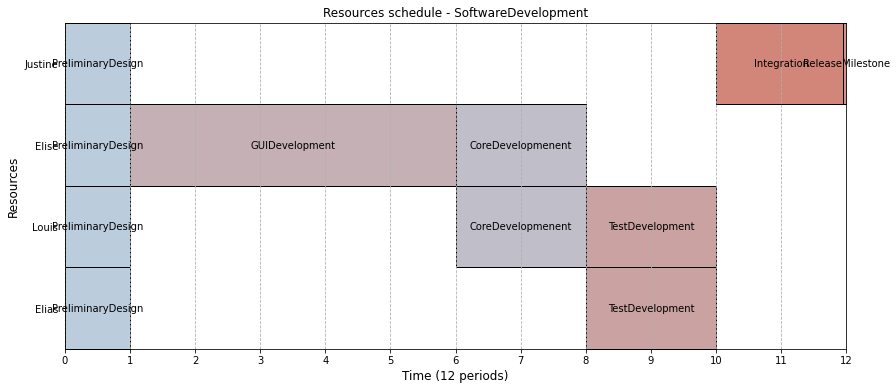

In [147]:
problem.render_gantt_matplotlib(fig_size=(14,6), render_mode='Resources')